# CSE-CIC-IDS 2017

In [5]:
import numpy as np
np.random.seed(42)
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import glob, time, os, pickle

import keras

In [2]:
NOTEBOOK_PATH = "C:/Users/Xetrov/Desktop/SciFair20/Code/"

In [3]:
x_scaled = pd.read_csv(NOTEBOOK_PATH + "IDS2017/x_scaled_powertransform.csv")

In [4]:
y_df_enc = pd.read_csv(NOTEBOOK_PATH + "IDS2017/y_all_binary.csv")

# Split data into train and test

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_valtest, y_train, y_valtest = train_test_split(x_scaled, y_df_enc, test_size = 0.4, random_state = 42)

In [14]:
x_val, x_test, y_val, y_test = train_test_split(x_valtest, y_valtest, test_size = 0.5, random_state = 42)

In [15]:
del x_train
del y_train
del x_valtest 
del y_valtest

# RoC Graphs

In [8]:
# Load a model

rf = pickle.load(open(NOTEBOOK_PATH + "Models/randomforest5-binary [20191027 1909].pkl", 'rb'))

dnn = keras.models.load_model(NOTEBOOK_PATH + "Models/dnn7-autoencodershape/dnn(441).h5")

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score

In [16]:
dnn_pred = dnn.predict(x_test)

In [74]:
rf_pred = rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   16.1s finished


In [75]:
rf_pred_prob = rf.predict_proba(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   16.0s finished


In [17]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, dnn_pred)

In [39]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, rf_pred[:,1])

In [30]:
fpr1[:30]

array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.0000022, 0.0000044,
       0.0000044, 0.0000044, 0.0000044, 0.0000044, 0.0000044, 0.0000044,
       0.0000044, 0.0000044, 0.0000044, 0.0000044, 0.0000044, 0.0000044])

In [70]:
dnn_auc = roc_auc_score(y_test, dnn_pred.round())

In [76]:
rf_auc = roc_auc_score(y_test, rf_pred)

In [77]:
dnn_auc

0.9999139347521736

In [78]:
rf_auc

0.9988890478848582

In [98]:
len(fpr1)

50490

In [97]:
len(fpr2)

735

In [100]:
y_test['IsAttack'].value_counts()

0    454790
1    111359
Name: IsAttack, dtype: int64

(0.5, 1.005)

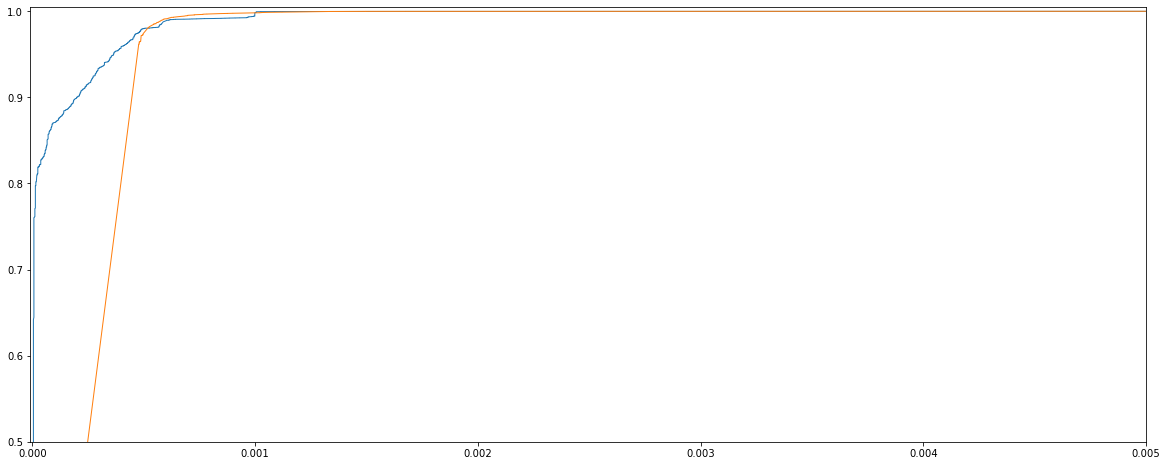

In [96]:
plt.figure(figsize=(20,8))
n = -1
plt.plot(fpr1[:n], tpr1[:n], lw=1)
plt.plot(fpr2[:n], tpr2[:n], lw=1)
plt.xlim((-0.00001,0.005))
plt.ylim((0.5,1.005))